# Comparação de Ensembles #

## Parte I - Carregando e tratando inicialmente o dataset

1- Use uma base de dados para classificação com pelo menos 1000 amostras;

Utilizarei uma base do próprio Scikit Learn dos dígitos que possui 1797 amostras.

In [14]:
from sklearn.datasets import load_digits
import pandas as pd
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

digits = load_digits()
print(digits.data.shape)

(1797, 64)


<Figure size 432x288 with 0 Axes>

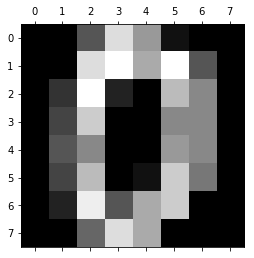

In [15]:
import matplotlib.pyplot as plt
plt.gray()
plt.matshow(digits.images[0])

plt.show()

In [16]:
X = digits.data
y = digits.target

X.shape, y.shape

((1797, 64), (1797,))

In [17]:
#por ultimo, vamos preparar a base já dividindo em treino e teste

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1347, 64), (450, 64), (1347,), (450,))

## Parte II - Comparando Ensembles #

Escolha pelo menos três algoritmos de classificação para comparação dos emsembles.

Escolhi o Bagging, AdaBoost e RandomForest, mas fiz o teste também com o KNN, o LogisticRegression e o SVM.


In [18]:
import warnings
warnings.filterwarnings('ignore')

### KNN

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer, mean_squared_error

parametros = {
    'n_neighbors': [3,5,7,9,11], 
    'weights': ['uniform', 'distance'],
    'metric': ['euclidian', 'manhattan']}
modKNN = GridSearchCV(KNeighborsClassifier(), parametros, verbose=1, cv=3, scoring=make_scorer(mean_squared_error, greater_is_better=False, squared=False))
modKNN.fit(X_train, y_train)

print(modKNN.best_score_)
print(modKNN.best_estimator_)
print(modKNN.best_params_)

y_pred_knn = modKNN.predict(X_test)
accuracy_score(y_test, y_pred_knn)


Fitting 3 folds for each of 20 candidates, totalling 60 fits
-0.737110324467266
KNeighborsClassifier(metric='manhattan', n_neighbors=3, weights='distance')
{'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}


0.98

In [20]:
from sklearn.neighbors import KNeighborsClassifier
knnModel = KNeighborsClassifier(metric='manhattan', n_neighbors=9, weights='distance')
knnModel.fit(X_train, y_train)
y_pred_knn = knnModel.predict(X_test)

accuracy_score(y_test, y_pred_knn)

0.9844444444444445

### LogisticRegression

In [21]:
from sklearn.linear_model import LogisticRegression

parametros = {
    'solver': ['newton-cg', 'lbfgs', 'liblinear'], 
    'penalty': ['none', 'l1', 'l2', 'elasticnet'],
    'C': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]}
modLR = GridSearchCV(LogisticRegression(), parametros, verbose=1, cv=3, scoring=make_scorer(mean_squared_error, greater_is_better=False, squared=False))
modLR.fit(X_train, y_train)

print(modLR.best_score_)
print(modLR.best_estimator_)
print(modLR.best_params_)

y_pred_lr = modLR.predict(X_test)
accuracy_score(y_test, y_pred_lr)


Fitting 3 folds for each of 96 candidates, totalling 288 fits
-0.9414969697685972
LogisticRegression(C=0.1, penalty='l1', solver='liblinear')
{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}


0.9622222222222222

In [22]:
lrModel = LogisticRegression()
lrModel.fit(X_train, y_train)
y_pred_lr = lrModel.predict(X_test)

accuracy_score(y_test, y_pred_lr)

0.9733333333333334

### SVM

In [23]:
from sklearn.svm import SVC
parametros = {
    'C': [0.1,1, 10, 100], 
    'gamma': [0.01,0.001],
    'kernel': ['rbf', 'poly', 'sigmoid']
}

modSVC = GridSearchCV(SVC(), parametros, verbose=1, cv=3, scoring=make_scorer(mean_squared_error, greater_is_better=False, squared=False))
modSVC.fit(X_train, y_train)

print(modSVC.best_score_)
print(modSVC.best_estimator_)
print(modSVC.best_params_)

y_pred_svc = modSVC.predict(X_test)
accuracy_score(y_test, y_pred_svc)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
-0.5439397105662817
SVC(C=0.1, gamma=0.001, kernel='poly')
{'C': 0.1, 'gamma': 0.001, 'kernel': 'poly'}


0.9911111111111112

### Bagging Classifier

In [24]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

parametros = {
    'base_estimator__max_depth' : [1, 2, 3, 4, 5],
    'max_samples' : [0.05, 0.1, 0.2, 0.5]
}

modBagging = GridSearchCV(BaggingClassifier(DecisionTreeClassifier(), n_estimators = 100, max_features = 0.5),
                         parametros, verbose=1, cv=3, scoring=make_scorer(mean_squared_error, greater_is_better=False, squared=False))
modBagging.fit(X_train, y_train)
y_pred_bag = modBagging.predict(X_test)

accuracy_score(y_test, y_pred_bag)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


0.9533333333333334

### Ada Boost

In [25]:
from sklearn.ensemble import AdaBoostClassifier

parametros = {
    'n_estimators': [10, 50, 100, 500],
    'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0]
}

modAdaBoost = GridSearchCV(AdaBoostClassifier(), parametros, verbose=1, cv=3, scoring=make_scorer(mean_squared_error, greater_is_better=False, squared=False))
modAdaBoost.fit(X_train, y_train)
y_pred_ada = modAdaBoost.predict(X_test)

accuracy_score(y_test, y_pred_ada)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


0.7933333333333333

### Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier

parametros = {
    'max_depth': [15, 50],
    'max_features': [2, 3, 4],
    #'min_samples_leaf': [3, 4, 5],
    #'min_samples_split': [8, 10, 12], #demorando muito...
    'n_estimators': [100, 200, 300, 1000]
}

rfModel = GridSearchCV(RandomForestClassifier(), param_grid=parametros, verbose=1, cv=3, scoring=make_scorer(mean_squared_error, greater_is_better=False, squared=False))
rfModel.fit(X_train, y_train)
y_pred_rf = rfModel.predict(X_test)

accuracy_score(y_test, y_pred_rf)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


0.9733333333333334

Vamos verificar as diferenças apresentadas em cada resultado para uma avaliação melhor.

In [27]:
#baghits = y_pred_bag == y_test
#adahits = y_pred_ada == y_test
#rfhits = y_pred_rf == y_test    

#caso queria avaliar como cada um desses classificadores está selecionando seu rotulo:
#y_pred = np.stack((baghits, adahits, rfhits))
#y_pred.T

## Combinação dos classificadores

### Voting

In [28]:
from sklearn.ensemble import VotingClassifier
vcModel = VotingClassifier([
    ('knn', modKNN),
    ('logisticregression', modLR),
    ('svc', modSVC)
])

vcModel.fit(X_train, y_train)
y_pred_vc = vcModel.predict(X_test)

vohits = y_pred_vc == y_test
print("VOTING\nClassificadores fracos\n", accuracy_score(y_test, y_pred_vc))

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Fitting 3 folds for each of 96 candidates, totalling 288 fits
Fitting 3 folds for each of 24 candidates, totalling 72 fits
VOTING
Classificadores fracos
 0.9866666666666667


### Stacking

In [29]:
from sklearn.ensemble import StackingClassifier

modeloStacking = StackingClassifier([
    ('voting', vcModel),
    ('bagging', modBagging),
    ('adaboost', modAdaBoost),
    ('randomforest', rfModel)
], cv=3, passthrough=True)
#vc = 3, validação cruzada estratificada, buscando melhorar
#passTrue reutiliza os dados para treinar tudo

modeloStacking.fit(X_train, y_train)
y_pred_stack = modeloStacking.predict(X_test)

print("STACKING\nClassificadores ensemble\n", accuracy_score(y_test, y_pred_stack))
schits = y_pred_stack == y_test


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Fitting 3 folds for each of 96 candidates, totalling 288 fits
Fitting 3 folds for each of 24 candidates, totalling 72 fits
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Fitting 3 folds for each of 24 candidates, totalling 72 fits
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Fitting 3 folds for each of 96 candidates, totalling 288 fits
Fitting 3 folds for each of 24 candidates, totalling 72 fits
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Fitting 3 folds for each of 96 candidates, totalling 288 fits
Fitting 3 folds for each of 24 candidates, totalling 72 fits
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Fitting 3 folds for each of 96 candidates, totalling 288 fits
Fitting 3 folds for each of 24 candidates, totalling 72 fits
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Fitting 3 folds for 

### Resultados

Interessante como alguns classificadores "fracos" tiveram resultados muito bons para esta base otimizando seus parâmetros com GridSarch. Interessante também notar que mesmo os classificadores de ensemble não terem tido os melhores resultados individualmente, como o AdaBoost que piorou bastante, ainda assim, o stacking com os ensembles garantiu um resultado muito bom confirmando a consistência e forte possibilidade de melhora na classificação que é esperada quando se aplica esta técnica.